# **Handling Outliers**

## **Z-score method on normal distribution**

In [32]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


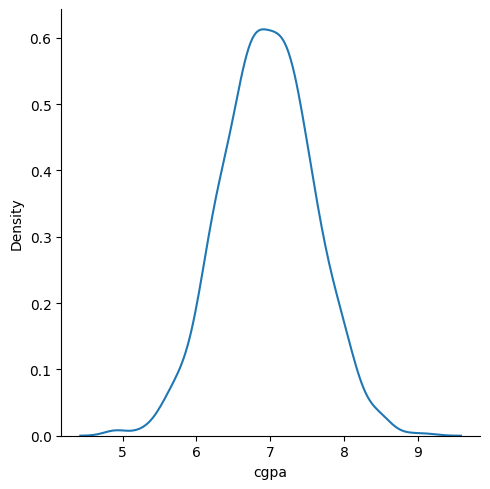

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['cgpa'],kind='kde')
plt.show()

In [27]:
print('Mean of cgpa ',round(df['cgpa'].mean(),2))
print('Standard deviation of cgpa ', round(df['cgpa'].std(),2))
print('Maximum is ',round(df['cgpa'].max(),2))
print('Minimum is ',round(df['cgpa'].min(),2))

Mean of cgpa  6.96
Standard deviation of cgpa  0.62
Maximum is  9.12
Minimum is  4.89


In [29]:
upper_limit = df['cgpa'].mean() + (3*df['cgpa'].std())
upper_limit

8.808933625397168

In [31]:
lower_limit = df['cgpa'].mean() - (3*df['cgpa'].std())
lower_limit

5.113546374602832

### **Trimming**

We are removing those rows who is crossing limits

In [39]:
df[(df['cgpa'] < upper_limit) & (df['cgpa'] > lower_limit)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### **Calculating Z-score**

In [42]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / (df['cgpa'].std())
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


### **Trimming using Z-score**

In [43]:
df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping

Capping is like we replace those values which is high than upper limit to upper limit and vise versa for lower limit

In [44]:
df['cgpa'] = np.where(df['cgpa'] < lower_limit, lower_limit, np.where(df['cgpa'] > upper_limit,upper_limit,df['cgpa']))

In [47]:
df['cgpa'].max()

8.808933625397168

In [48]:
df['cgpa'].min()

5.113546374602832